# Neural Net to Predict Age

# Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sb

# Data

In [2]:
data = pd.read_csv("./Volumetric_features.csv")

data_features = pd.DataFrame(data, columns = data.columns[:-1])
data_features = data_features.drop(['S.No','Age'], axis=1)

data_features.head()
data_features.describe()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03
mean,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,1797.243469,...,2.117151,2.655624,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06
std,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,583.220321,...,0.174228,0.207942,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05
min,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,371.900000,...,1.499000,1.563000,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05
25%,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,1408.050000,...,2.002250,2.521000,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06
50%,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,1683.850000,...,2.130000,2.665000,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06
75%,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,2044.525000,...,2.245000,2.808000,2.562750,2.851000,3.790000,2.476000,2.975000,2.483143,1.168888e+06,1.625445e+06
max,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,5312.400000,...,2.671000,3.240000,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06


# Preprocessing

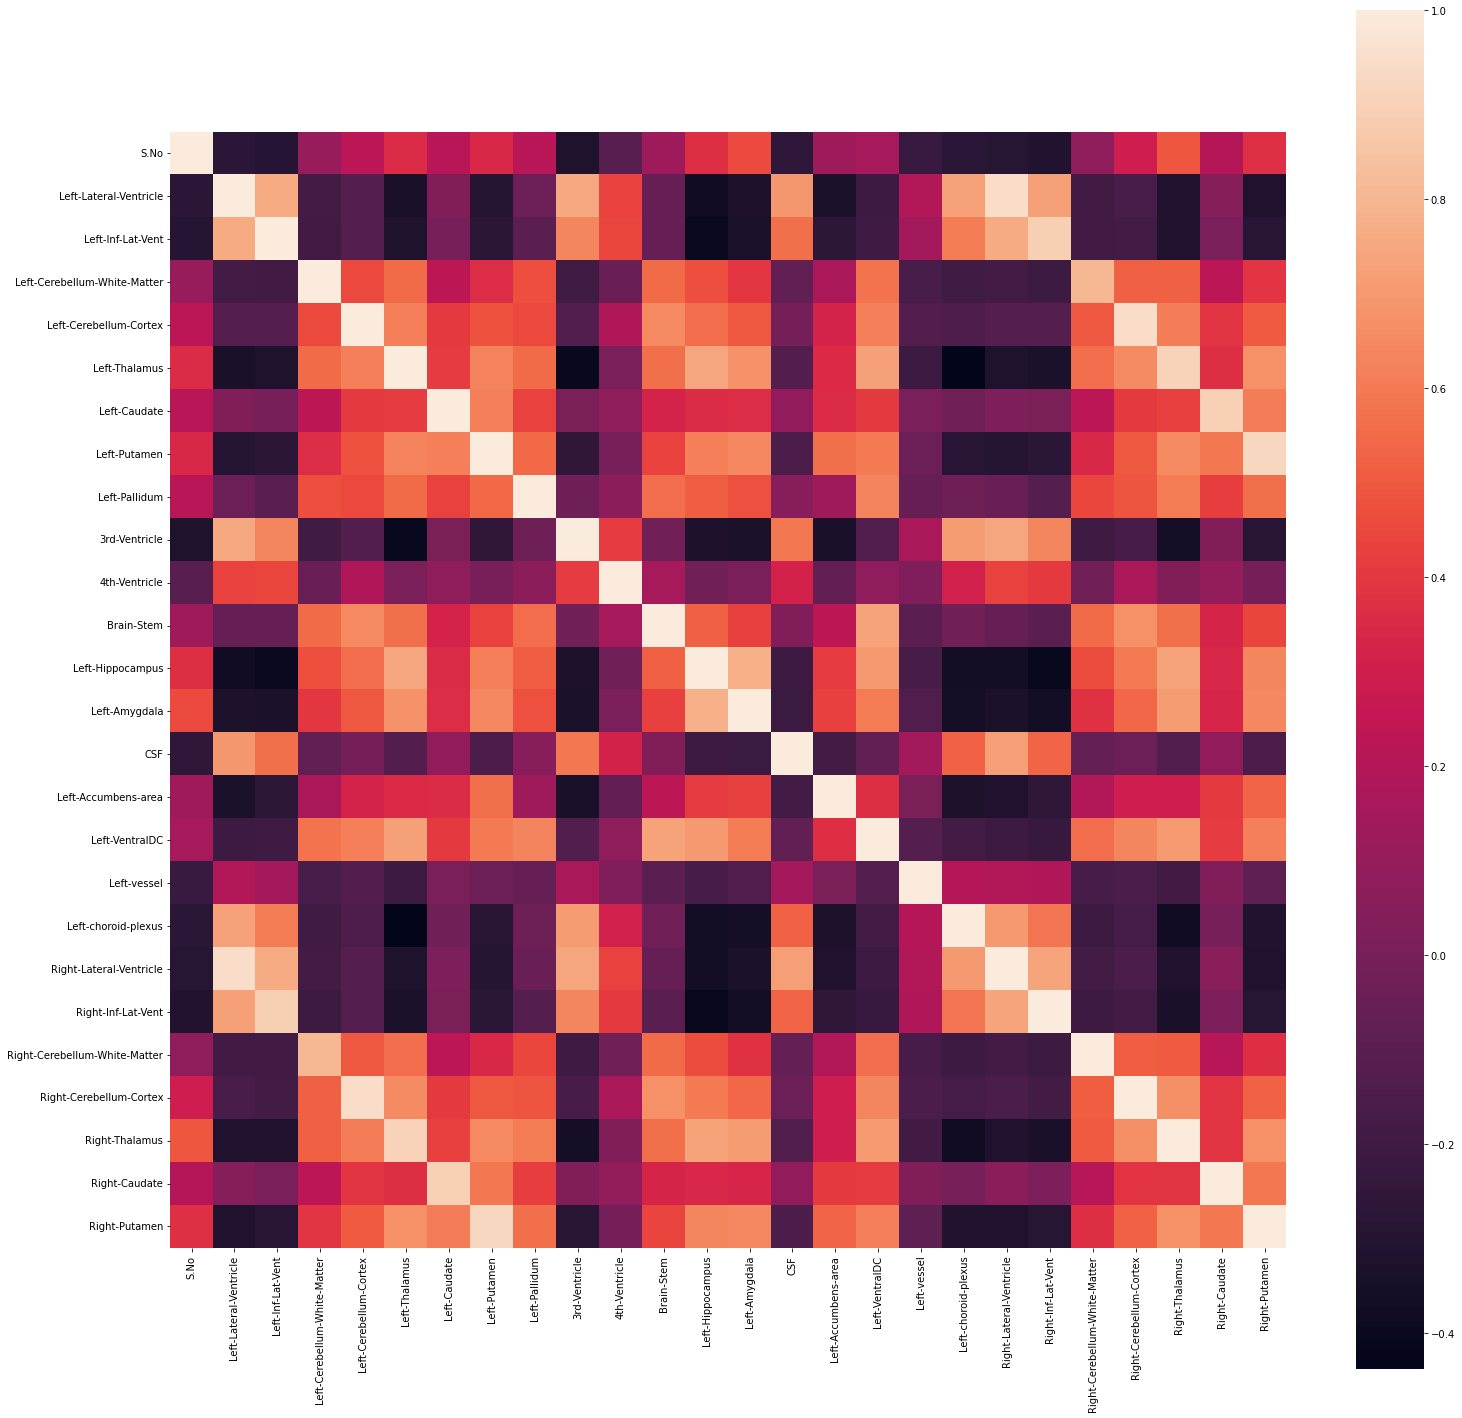

In [3]:
C_mat = data.iloc[:,:-115].corr()
fig = plt.figure(figsize = (25,25))

sb.heatmap(C_mat, square=True)
plt.show()

# Create Model

In [37]:
model = keras.models.Sequential()

model.add(keras.Input(shape=(138,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(278, activation='relu'))
#model.add(layers.Dense(278, activation='relu'))
#model.add(layers.Dense(278, activation='relu'))
#model.add(layers.Dense(138, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 278)               38642     
_________________________________________________________________
dense_44 (Dense)             (None, 278)               77562     
_________________________________________________________________
dense_45 (Dense)             (None, 278)               77562     
_________________________________________________________________
dense_46 (Dense)             (None, 278)               77562     
_________________________________________________________________
dense_47 (Dense)             (None, 278)               77562     
_________________________________________________________________
dense_48 (Dense)             (None, 138)               38502     
_________________________________________________________________
dense_49 (Dense)             (None, 1)                

# Training

In [38]:
# Split out train data, 80%, and the rest, 20%
X_train, X_rest, Y_train, Y_rest = train_test_split(data_features, data['Age'], test_size=0.20, random_state=33)
# Spit out validate data, 15% (of total, 75% of X_rest), and test, 5% (of total, 25% of rest)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_rest, Y_rest, test_size=0.25, random_state=37)

training = model.fit(X_train, Y_train, batch_size=256, verbose=1, epochs=1500, validation_data=(X_validate, Y_validate))

score = model.evaluate(X_validate, Y_validate, verbose=0, batch_size=32)

print(score)
print("Validate mean_absolute_error:", score[0])
print("Validate accuracy:", score[1])

Epoch 1/1500
14/14 [==============================] - 0s 34ms/step - loss: 34371.2344 - mean_absolute_error: 34371.2344 - val_loss: 7872.9731 - val_mean_absolute_error: 7872.9731
Epoch 2/1500
14/14 [==============================] - 0s 24ms/step - loss: 4259.0078 - mean_absolute_error: 4259.0078 - val_loss: 127.0998 - val_mean_absolute_error: 127.0998
Epoch 3/1500
14/14 [==============================] - 0s 21ms/step - loss: 3532.6438 - mean_absolute_error: 3532.6438 - val_loss: 2724.7981 - val_mean_absolute_error: 2724.7981
Epoch 4/1500
14/14 [==============================] - 0s 21ms/step - loss: 2016.2745 - mean_absolute_error: 2016.2745 - val_loss: 675.8449 - val_mean_absolute_error: 675.8449
Epoch 5/1500
14/14 [==============================] - 0s 18ms/step - loss: 989.5933 - mean_absolute_error: 989.5933 - val_loss: 978.4963 - val_mean_absolute_error: 978.4963
Epoch 6/1500
14/14 [==============================] - 0s 25ms/step - loss: 709.8923 - mean_absolute_error: 709.8923 - val

Epoch 49/1500
14/14 [==============================] - 0s 22ms/step - loss: 38.7889 - mean_absolute_error: 38.7889 - val_loss: 24.2215 - val_mean_absolute_error: 24.2215
Epoch 50/1500
14/14 [==============================] - 0s 19ms/step - loss: 19.5624 - mean_absolute_error: 19.5624 - val_loss: 16.9463 - val_mean_absolute_error: 16.9463
Epoch 51/1500
14/14 [==============================] - 0s 20ms/step - loss: 15.9095 - mean_absolute_error: 15.9095 - val_loss: 22.0930 - val_mean_absolute_error: 22.0930
Epoch 52/1500
14/14 [==============================] - 0s 19ms/step - loss: 14.2843 - mean_absolute_error: 14.2843 - val_loss: 24.8993 - val_mean_absolute_error: 24.8993
Epoch 53/1500
14/14 [==============================] - 0s 24ms/step - loss: 18.4093 - mean_absolute_error: 18.4093 - val_loss: 14.6125 - val_mean_absolute_error: 14.6125
Epoch 54/1500
14/14 [==============================] - 0s 21ms/step - loss: 15.0921 - mean_absolute_error: 15.0921 - val_loss: 14.9238 - val_mean_abso

14/14 [==============================] - 0s 18ms/step - loss: 12.7184 - mean_absolute_error: 12.7184 - val_loss: 16.8448 - val_mean_absolute_error: 16.8448
Epoch 98/1500
14/14 [==============================] - 0s 18ms/step - loss: 13.2357 - mean_absolute_error: 13.2357 - val_loss: 14.7531 - val_mean_absolute_error: 14.7531
Epoch 99/1500
14/14 [==============================] - 0s 17ms/step - loss: 12.6935 - mean_absolute_error: 12.6935 - val_loss: 13.4121 - val_mean_absolute_error: 13.4121
Epoch 100/1500
14/14 [==============================] - 0s 30ms/step - loss: 12.2374 - mean_absolute_error: 12.2374 - val_loss: 18.4243 - val_mean_absolute_error: 18.4243
Epoch 101/1500
14/14 [==============================] - 0s 23ms/step - loss: 13.8932 - mean_absolute_error: 13.8932 - val_loss: 13.2003 - val_mean_absolute_error: 13.2003
Epoch 102/1500
14/14 [==============================] - 0s 17ms/step - loss: 12.4574 - mean_absolute_error: 12.4574 - val_loss: 18.1623 - val_mean_absolute_error:

Epoch 145/1500
14/14 [==============================] - 0s 23ms/step - loss: 14.4474 - mean_absolute_error: 14.4474 - val_loss: 17.2990 - val_mean_absolute_error: 17.2990
Epoch 146/1500
14/14 [==============================] - 0s 20ms/step - loss: 14.2956 - mean_absolute_error: 14.2956 - val_loss: 13.6005 - val_mean_absolute_error: 13.6005
Epoch 147/1500
14/14 [==============================] - 0s 19ms/step - loss: 12.1901 - mean_absolute_error: 12.1901 - val_loss: 13.2257 - val_mean_absolute_error: 13.2257
Epoch 148/1500
14/14 [==============================] - 0s 26ms/step - loss: 12.0209 - mean_absolute_error: 12.0209 - val_loss: 13.4485 - val_mean_absolute_error: 13.4485
Epoch 149/1500
14/14 [==============================] - 0s 21ms/step - loss: 12.8912 - mean_absolute_error: 12.8912 - val_loss: 15.2182 - val_mean_absolute_error: 15.2182
Epoch 150/1500
14/14 [==============================] - 0s 19ms/step - loss: 12.7699 - mean_absolute_error: 12.7699 - val_loss: 13.4227 - val_mea

Epoch 193/1500
14/14 [==============================] - 0s 21ms/step - loss: 12.7350 - mean_absolute_error: 12.7350 - val_loss: 16.6073 - val_mean_absolute_error: 16.6073
Epoch 194/1500
14/14 [==============================] - 0s 22ms/step - loss: 13.2929 - mean_absolute_error: 13.2929 - val_loss: 13.4227 - val_mean_absolute_error: 13.4227
Epoch 195/1500
14/14 [==============================] - 0s 25ms/step - loss: 11.7901 - mean_absolute_error: 11.7901 - val_loss: 12.5043 - val_mean_absolute_error: 12.5043
Epoch 196/1500
14/14 [==============================] - 0s 21ms/step - loss: 11.5273 - mean_absolute_error: 11.5273 - val_loss: 12.9807 - val_mean_absolute_error: 12.9807
Epoch 197/1500
14/14 [==============================] - 0s 19ms/step - loss: 11.6670 - mean_absolute_error: 11.6670 - val_loss: 12.5649 - val_mean_absolute_error: 12.5649
Epoch 198/1500
14/14 [==============================] - 0s 21ms/step - loss: 11.6711 - mean_absolute_error: 11.6711 - val_loss: 15.5394 - val_mea

Epoch 241/1500
14/14 [==============================] - 0s 20ms/step - loss: 11.7417 - mean_absolute_error: 11.7417 - val_loss: 12.4218 - val_mean_absolute_error: 12.4218
Epoch 242/1500
14/14 [==============================] - 0s 22ms/step - loss: 11.4428 - mean_absolute_error: 11.4428 - val_loss: 12.7869 - val_mean_absolute_error: 12.7869
Epoch 243/1500
14/14 [==============================] - 0s 19ms/step - loss: 11.3345 - mean_absolute_error: 11.3345 - val_loss: 13.2009 - val_mean_absolute_error: 13.2009
Epoch 244/1500
14/14 [==============================] - 0s 15ms/step - loss: 11.4816 - mean_absolute_error: 11.4816 - val_loss: 13.2552 - val_mean_absolute_error: 13.2552
Epoch 245/1500
14/14 [==============================] - 0s 17ms/step - loss: 11.9673 - mean_absolute_error: 11.9673 - val_loss: 13.4914 - val_mean_absolute_error: 13.4914
Epoch 246/1500
14/14 [==============================] - 0s 17ms/step - loss: 11.5597 - mean_absolute_error: 11.5597 - val_loss: 12.7260 - val_mea

Epoch 289/1500
14/14 [==============================] - 0s 21ms/step - loss: 11.5616 - mean_absolute_error: 11.5616 - val_loss: 12.9752 - val_mean_absolute_error: 12.9752
Epoch 290/1500
14/14 [==============================] - 0s 20ms/step - loss: 11.4957 - mean_absolute_error: 11.4957 - val_loss: 11.8178 - val_mean_absolute_error: 11.8178
Epoch 291/1500
14/14 [==============================] - 0s 20ms/step - loss: 11.3766 - mean_absolute_error: 11.3766 - val_loss: 12.0210 - val_mean_absolute_error: 12.0210
Epoch 292/1500
14/14 [==============================] - 0s 20ms/step - loss: 11.0914 - mean_absolute_error: 11.0914 - val_loss: 11.9943 - val_mean_absolute_error: 11.9943
Epoch 293/1500
14/14 [==============================] - 0s 23ms/step - loss: 11.1255 - mean_absolute_error: 11.1255 - val_loss: 12.2569 - val_mean_absolute_error: 12.2569
Epoch 294/1500
14/14 [==============================] - 0s 23ms/step - loss: 10.8806 - mean_absolute_error: 10.8806 - val_loss: 12.1181 - val_mea

Epoch 337/1500
14/14 [==============================] - 0s 19ms/step - loss: 11.3558 - mean_absolute_error: 11.3558 - val_loss: 12.6207 - val_mean_absolute_error: 12.6207
Epoch 338/1500
14/14 [==============================] - 0s 20ms/step - loss: 11.8062 - mean_absolute_error: 11.8062 - val_loss: 11.9929 - val_mean_absolute_error: 11.9929
Epoch 339/1500
14/14 [==============================] - 0s 20ms/step - loss: 11.1558 - mean_absolute_error: 11.1558 - val_loss: 11.8756 - val_mean_absolute_error: 11.8756
Epoch 340/1500
14/14 [==============================] - 0s 16ms/step - loss: 11.2033 - mean_absolute_error: 11.2033 - val_loss: 12.5162 - val_mean_absolute_error: 12.5162
Epoch 341/1500
14/14 [==============================] - 0s 17ms/step - loss: 11.2076 - mean_absolute_error: 11.2076 - val_loss: 11.6908 - val_mean_absolute_error: 11.6908
Epoch 342/1500
14/14 [==============================] - 0s 17ms/step - loss: 11.0444 - mean_absolute_error: 11.0444 - val_loss: 11.6477 - val_mea

Epoch 385/1500
14/14 [==============================] - 0s 21ms/step - loss: 11.1386 - mean_absolute_error: 11.1386 - val_loss: 11.3972 - val_mean_absolute_error: 11.3972
Epoch 386/1500
14/14 [==============================] - 0s 20ms/step - loss: 10.5833 - mean_absolute_error: 10.5833 - val_loss: 11.2882 - val_mean_absolute_error: 11.2882
Epoch 387/1500
14/14 [==============================] - 0s 21ms/step - loss: 10.5239 - mean_absolute_error: 10.5239 - val_loss: 11.7105 - val_mean_absolute_error: 11.7105
Epoch 388/1500
14/14 [==============================] - 0s 20ms/step - loss: 10.3605 - mean_absolute_error: 10.3605 - val_loss: 11.3798 - val_mean_absolute_error: 11.3798
Epoch 389/1500
14/14 [==============================] - 0s 19ms/step - loss: 10.6110 - mean_absolute_error: 10.6110 - val_loss: 12.4679 - val_mean_absolute_error: 12.4679
Epoch 390/1500
14/14 [==============================] - 0s 18ms/step - loss: 10.6027 - mean_absolute_error: 10.6027 - val_loss: 12.0826 - val_mea

Epoch 433/1500
14/14 [==============================] - 0s 17ms/step - loss: 10.9995 - mean_absolute_error: 10.9995 - val_loss: 15.0550 - val_mean_absolute_error: 15.0550
Epoch 434/1500
14/14 [==============================] - 0s 19ms/step - loss: 11.3628 - mean_absolute_error: 11.3628 - val_loss: 11.9549 - val_mean_absolute_error: 11.9549
Epoch 435/1500
14/14 [==============================] - 0s 18ms/step - loss: 11.6781 - mean_absolute_error: 11.6781 - val_loss: 14.0635 - val_mean_absolute_error: 14.0635
Epoch 436/1500
14/14 [==============================] - 0s 17ms/step - loss: 11.9837 - mean_absolute_error: 11.9837 - val_loss: 16.9119 - val_mean_absolute_error: 16.9119
Epoch 437/1500
14/14 [==============================] - 0s 18ms/step - loss: 12.3216 - mean_absolute_error: 12.3216 - val_loss: 12.3386 - val_mean_absolute_error: 12.3386
Epoch 438/1500
14/14 [==============================] - 0s 21ms/step - loss: 12.0635 - mean_absolute_error: 12.0635 - val_loss: 13.2038 - val_mea

Epoch 481/1500
14/14 [==============================] - 0s 22ms/step - loss: 12.6137 - mean_absolute_error: 12.6137 - val_loss: 13.2666 - val_mean_absolute_error: 13.2666
Epoch 482/1500
14/14 [==============================] - 0s 21ms/step - loss: 11.6509 - mean_absolute_error: 11.6509 - val_loss: 12.3057 - val_mean_absolute_error: 12.3057
Epoch 483/1500
14/14 [==============================] - 0s 18ms/step - loss: 11.8965 - mean_absolute_error: 11.8965 - val_loss: 12.6640 - val_mean_absolute_error: 12.6640
Epoch 484/1500
14/14 [==============================] - 0s 17ms/step - loss: 11.1156 - mean_absolute_error: 11.1156 - val_loss: 11.7569 - val_mean_absolute_error: 11.7569
Epoch 485/1500
14/14 [==============================] - 0s 17ms/step - loss: 11.0920 - mean_absolute_error: 11.0920 - val_loss: 13.5255 - val_mean_absolute_error: 13.5255
Epoch 486/1500
14/14 [==============================] - 0s 17ms/step - loss: 11.7985 - mean_absolute_error: 11.7985 - val_loss: 12.5801 - val_mea

Epoch 529/1500
14/14 [==============================] - 0s 18ms/step - loss: 2484.7769 - mean_absolute_error: 2484.7769 - val_loss: 1656.8770 - val_mean_absolute_error: 1656.8770
Epoch 530/1500
14/14 [==============================] - 0s 19ms/step - loss: 626.3740 - mean_absolute_error: 626.3740 - val_loss: 22.6670 - val_mean_absolute_error: 22.6670
Epoch 531/1500
14/14 [==============================] - 0s 23ms/step - loss: 148.8105 - mean_absolute_error: 148.8105 - val_loss: 41.5394 - val_mean_absolute_error: 41.5394
Epoch 532/1500
14/14 [==============================] - 0s 22ms/step - loss: 56.7922 - mean_absolute_error: 56.7922 - val_loss: 27.7959 - val_mean_absolute_error: 27.7959
Epoch 533/1500
14/14 [==============================] - 0s 19ms/step - loss: 23.1010 - mean_absolute_error: 23.1010 - val_loss: 19.4142 - val_mean_absolute_error: 19.4142
Epoch 534/1500
14/14 [==============================] - 0s 19ms/step - loss: 19.4838 - mean_absolute_error: 19.4838 - val_loss: 19.92

Epoch 577/1500
14/14 [==============================] - 0s 16ms/step - loss: 10.8209 - mean_absolute_error: 10.8209 - val_loss: 11.6129 - val_mean_absolute_error: 11.6129
Epoch 578/1500
14/14 [==============================] - 0s 19ms/step - loss: 11.1877 - mean_absolute_error: 11.1877 - val_loss: 13.0687 - val_mean_absolute_error: 13.0687
Epoch 579/1500
14/14 [==============================] - 0s 21ms/step - loss: 12.0036 - mean_absolute_error: 12.0036 - val_loss: 12.8276 - val_mean_absolute_error: 12.8276
Epoch 580/1500
14/14 [==============================] - 0s 21ms/step - loss: 11.2159 - mean_absolute_error: 11.2159 - val_loss: 11.6727 - val_mean_absolute_error: 11.6727
Epoch 581/1500
14/14 [==============================] - 0s 22ms/step - loss: 11.0123 - mean_absolute_error: 11.0123 - val_loss: 13.0400 - val_mean_absolute_error: 13.0400
Epoch 582/1500
14/14 [==============================] - 0s 18ms/step - loss: 11.1813 - mean_absolute_error: 11.1813 - val_loss: 11.5928 - val_mea

Epoch 625/1500
14/14 [==============================] - 0s 17ms/step - loss: 10.1971 - mean_absolute_error: 10.1971 - val_loss: 11.3545 - val_mean_absolute_error: 11.3545
Epoch 626/1500
14/14 [==============================] - 0s 21ms/step - loss: 10.1997 - mean_absolute_error: 10.1997 - val_loss: 11.4461 - val_mean_absolute_error: 11.4461
Epoch 627/1500
14/14 [==============================] - 0s 20ms/step - loss: 10.2252 - mean_absolute_error: 10.2252 - val_loss: 11.4066 - val_mean_absolute_error: 11.4066
Epoch 628/1500
14/14 [==============================] - 0s 21ms/step - loss: 10.5161 - mean_absolute_error: 10.5161 - val_loss: 13.6397 - val_mean_absolute_error: 13.6397
Epoch 629/1500
14/14 [==============================] - 0s 19ms/step - loss: 11.3558 - mean_absolute_error: 11.3558 - val_loss: 11.6176 - val_mean_absolute_error: 11.6176
Epoch 630/1500
14/14 [==============================] - 0s 21ms/step - loss: 10.3790 - mean_absolute_error: 10.3790 - val_loss: 11.4650 - val_mea

Epoch 673/1500
14/14 [==============================] - 0s 21ms/step - loss: 10.1582 - mean_absolute_error: 10.1582 - val_loss: 14.2531 - val_mean_absolute_error: 14.2531
Epoch 674/1500
14/14 [==============================] - 0s 20ms/step - loss: 10.6963 - mean_absolute_error: 10.6963 - val_loss: 11.1986 - val_mean_absolute_error: 11.1986
Epoch 675/1500
14/14 [==============================] - 0s 22ms/step - loss: 10.0903 - mean_absolute_error: 10.0903 - val_loss: 11.2408 - val_mean_absolute_error: 11.2408
Epoch 676/1500
14/14 [==============================] - 0s 21ms/step - loss: 10.7856 - mean_absolute_error: 10.7856 - val_loss: 11.2015 - val_mean_absolute_error: 11.2015
Epoch 677/1500
14/14 [==============================] - 0s 20ms/step - loss: 10.3634 - mean_absolute_error: 10.3634 - val_loss: 11.5715 - val_mean_absolute_error: 11.5715
Epoch 678/1500
14/14 [==============================] - 0s 22ms/step - loss: 10.1028 - mean_absolute_error: 10.1028 - val_loss: 11.6760 - val_mea

14/14 [==============================] - 0s 18ms/step - loss: 9.6557 - mean_absolute_error: 9.6557 - val_loss: 10.9331 - val_mean_absolute_error: 10.9331
Epoch 722/1500
14/14 [==============================] - 0s 16ms/step - loss: 9.7406 - mean_absolute_error: 9.7406 - val_loss: 11.0456 - val_mean_absolute_error: 11.0456
Epoch 723/1500
14/14 [==============================] - 0s 23ms/step - loss: 9.8845 - mean_absolute_error: 9.8845 - val_loss: 11.5160 - val_mean_absolute_error: 11.5160
Epoch 724/1500
14/14 [==============================] - 0s 17ms/step - loss: 9.8849 - mean_absolute_error: 9.8849 - val_loss: 11.1573 - val_mean_absolute_error: 11.1573
Epoch 725/1500
14/14 [==============================] - 0s 17ms/step - loss: 9.6874 - mean_absolute_error: 9.6874 - val_loss: 11.3323 - val_mean_absolute_error: 11.3323
Epoch 726/1500
14/14 [==============================] - 0s 19ms/step - loss: 10.0528 - mean_absolute_error: 10.0528 - val_loss: 10.9698 - val_mean_absolute_error: 10.9698

14/14 [==============================] - 0s 18ms/step - loss: 9.7980 - mean_absolute_error: 9.7980 - val_loss: 11.2568 - val_mean_absolute_error: 11.2568
Epoch 770/1500
14/14 [==============================] - 0s 16ms/step - loss: 9.7343 - mean_absolute_error: 9.7343 - val_loss: 10.7494 - val_mean_absolute_error: 10.7494
Epoch 771/1500
14/14 [==============================] - 0s 17ms/step - loss: 9.4602 - mean_absolute_error: 9.4602 - val_loss: 10.7744 - val_mean_absolute_error: 10.7744
Epoch 772/1500
14/14 [==============================] - 0s 21ms/step - loss: 9.7494 - mean_absolute_error: 9.7494 - val_loss: 10.6706 - val_mean_absolute_error: 10.6706
Epoch 773/1500
14/14 [==============================] - 0s 20ms/step - loss: 9.5248 - mean_absolute_error: 9.5248 - val_loss: 10.9185 - val_mean_absolute_error: 10.9185
Epoch 774/1500
14/14 [==============================] - 0s 23ms/step - loss: 9.6096 - mean_absolute_error: 9.6096 - val_loss: 10.8709 - val_mean_absolute_error: 10.8709
E

14/14 [==============================] - 0s 18ms/step - loss: 9.1490 - mean_absolute_error: 9.1490 - val_loss: 10.7291 - val_mean_absolute_error: 10.7291
Epoch 818/1500
14/14 [==============================] - 0s 19ms/step - loss: 9.5634 - mean_absolute_error: 9.5634 - val_loss: 11.8793 - val_mean_absolute_error: 11.8793
Epoch 819/1500
14/14 [==============================] - 0s 18ms/step - loss: 9.8445 - mean_absolute_error: 9.8445 - val_loss: 10.5455 - val_mean_absolute_error: 10.5455
Epoch 820/1500
14/14 [==============================] - 0s 16ms/step - loss: 9.3314 - mean_absolute_error: 9.3314 - val_loss: 11.1814 - val_mean_absolute_error: 11.1814
Epoch 821/1500
14/14 [==============================] - 0s 19ms/step - loss: 9.5038 - mean_absolute_error: 9.5038 - val_loss: 10.8019 - val_mean_absolute_error: 10.8019
Epoch 822/1500
14/14 [==============================] - 0s 23ms/step - loss: 9.1415 - mean_absolute_error: 9.1415 - val_loss: 10.5687 - val_mean_absolute_error: 10.5687
E

14/14 [==============================] - 0s 20ms/step - loss: 9.6544 - mean_absolute_error: 9.6544 - val_loss: 10.4459 - val_mean_absolute_error: 10.4459
Epoch 866/1500
14/14 [==============================] - 0s 18ms/step - loss: 9.7348 - mean_absolute_error: 9.7348 - val_loss: 10.3862 - val_mean_absolute_error: 10.3862
Epoch 867/1500
14/14 [==============================] - 0s 17ms/step - loss: 9.8182 - mean_absolute_error: 9.8182 - val_loss: 11.2595 - val_mean_absolute_error: 11.2595
Epoch 868/1500
14/14 [==============================] - 0s 16ms/step - loss: 9.8012 - mean_absolute_error: 9.8012 - val_loss: 10.5752 - val_mean_absolute_error: 10.5752
Epoch 869/1500
14/14 [==============================] - 0s 17ms/step - loss: 9.1039 - mean_absolute_error: 9.1039 - val_loss: 10.5456 - val_mean_absolute_error: 10.5456
Epoch 870/1500
14/14 [==============================] - 0s 18ms/step - loss: 9.2074 - mean_absolute_error: 9.2074 - val_loss: 12.0228 - val_mean_absolute_error: 12.0228
E

14/14 [==============================] - 0s 20ms/step - loss: 10.3252 - mean_absolute_error: 10.3252 - val_loss: 10.6638 - val_mean_absolute_error: 10.6638
Epoch 914/1500
14/14 [==============================] - 0s 17ms/step - loss: 9.1062 - mean_absolute_error: 9.1062 - val_loss: 10.2961 - val_mean_absolute_error: 10.2961
Epoch 915/1500
14/14 [==============================] - 0s 18ms/step - loss: 9.0918 - mean_absolute_error: 9.0918 - val_loss: 10.9890 - val_mean_absolute_error: 10.9890
Epoch 916/1500
14/14 [==============================] - 0s 18ms/step - loss: 9.2300 - mean_absolute_error: 9.2300 - val_loss: 12.8082 - val_mean_absolute_error: 12.8082
Epoch 917/1500
14/14 [==============================] - 0s 19ms/step - loss: 10.1110 - mean_absolute_error: 10.1110 - val_loss: 10.2846 - val_mean_absolute_error: 10.2846
Epoch 918/1500
14/14 [==============================] - 0s 23ms/step - loss: 9.6165 - mean_absolute_error: 9.6165 - val_loss: 10.2686 - val_mean_absolute_error: 10.26

14/14 [==============================] - 0s 24ms/step - loss: 11.0596 - mean_absolute_error: 11.0596 - val_loss: 11.6190 - val_mean_absolute_error: 11.6190
Epoch 962/1500
14/14 [==============================] - 0s 19ms/step - loss: 9.4758 - mean_absolute_error: 9.4758 - val_loss: 10.0918 - val_mean_absolute_error: 10.0918
Epoch 963/1500
14/14 [==============================] - 0s 16ms/step - loss: 8.6612 - mean_absolute_error: 8.6612 - val_loss: 10.5827 - val_mean_absolute_error: 10.5827
Epoch 964/1500
14/14 [==============================] - 0s 18ms/step - loss: 8.9798 - mean_absolute_error: 8.9798 - val_loss: 10.9707 - val_mean_absolute_error: 10.9707
Epoch 965/1500
14/14 [==============================] - 0s 20ms/step - loss: 9.0304 - mean_absolute_error: 9.0304 - val_loss: 10.3781 - val_mean_absolute_error: 10.3781
Epoch 966/1500
14/14 [==============================] - 0s 20ms/step - loss: 8.9991 - mean_absolute_error: 8.9991 - val_loss: 10.1952 - val_mean_absolute_error: 10.1952

14/14 [==============================] - 0s 17ms/step - loss: 8.9787 - mean_absolute_error: 8.9787 - val_loss: 10.3174 - val_mean_absolute_error: 10.3174
Epoch 1010/1500
14/14 [==============================] - 0s 17ms/step - loss: 9.0225 - mean_absolute_error: 9.0225 - val_loss: 11.2091 - val_mean_absolute_error: 11.2091
Epoch 1011/1500
14/14 [==============================] - 0s 19ms/step - loss: 10.4714 - mean_absolute_error: 10.4714 - val_loss: 12.7991 - val_mean_absolute_error: 12.7991
Epoch 1012/1500
14/14 [==============================] - 0s 18ms/step - loss: 9.3746 - mean_absolute_error: 9.3746 - val_loss: 11.0467 - val_mean_absolute_error: 11.0467
Epoch 1013/1500
14/14 [==============================] - 0s 17ms/step - loss: 9.1259 - mean_absolute_error: 9.1259 - val_loss: 10.4083 - val_mean_absolute_error: 10.4083
Epoch 1014/1500
14/14 [==============================] - 0s 19ms/step - loss: 9.3429 - mean_absolute_error: 9.3429 - val_loss: 13.6976 - val_mean_absolute_error: 13

14/14 [==============================] - 0s 19ms/step - loss: 9.4612 - mean_absolute_error: 9.4612 - val_loss: 10.6611 - val_mean_absolute_error: 10.6611
Epoch 1058/1500
14/14 [==============================] - 0s 17ms/step - loss: 8.6932 - mean_absolute_error: 8.6932 - val_loss: 10.0033 - val_mean_absolute_error: 10.0033
Epoch 1059/1500
14/14 [==============================] - 0s 20ms/step - loss: 8.4453 - mean_absolute_error: 8.4453 - val_loss: 9.6743 - val_mean_absolute_error: 9.6743
Epoch 1060/1500
14/14 [==============================] - 0s 24ms/step - loss: 8.2106 - mean_absolute_error: 8.2106 - val_loss: 9.9731 - val_mean_absolute_error: 9.9731
Epoch 1061/1500
14/14 [==============================] - 0s 23ms/step - loss: 8.9946 - mean_absolute_error: 8.9946 - val_loss: 12.1832 - val_mean_absolute_error: 12.1832
Epoch 1062/1500
14/14 [==============================] - 0s 17ms/step - loss: 9.6827 - mean_absolute_error: 9.6827 - val_loss: 9.6911 - val_mean_absolute_error: 9.6911
Ep

14/14 [==============================] - 0s 19ms/step - loss: 8.2770 - mean_absolute_error: 8.2770 - val_loss: 9.4682 - val_mean_absolute_error: 9.4682
Epoch 1106/1500
14/14 [==============================] - 0s 19ms/step - loss: 7.9772 - mean_absolute_error: 7.9772 - val_loss: 9.9934 - val_mean_absolute_error: 9.9934
Epoch 1107/1500
14/14 [==============================] - 0s 18ms/step - loss: 8.8679 - mean_absolute_error: 8.8679 - val_loss: 10.4078 - val_mean_absolute_error: 10.4078
Epoch 1108/1500
14/14 [==============================] - 0s 20ms/step - loss: 8.8283 - mean_absolute_error: 8.8283 - val_loss: 10.0403 - val_mean_absolute_error: 10.0403
Epoch 1109/1500
14/14 [==============================] - 0s 19ms/step - loss: 8.8482 - mean_absolute_error: 8.8482 - val_loss: 9.8871 - val_mean_absolute_error: 9.8871
Epoch 1110/1500
14/14 [==============================] - 0s 17ms/step - loss: 8.1753 - mean_absolute_error: 8.1753 - val_loss: 10.4954 - val_mean_absolute_error: 10.4954
Ep

14/14 [==============================] - 0s 17ms/step - loss: 8.2401 - mean_absolute_error: 8.2401 - val_loss: 9.3208 - val_mean_absolute_error: 9.3208
Epoch 1154/1500
14/14 [==============================] - 0s 17ms/step - loss: 8.3394 - mean_absolute_error: 8.3394 - val_loss: 11.2569 - val_mean_absolute_error: 11.2569
Epoch 1155/1500
14/14 [==============================] - 0s 19ms/step - loss: 8.5864 - mean_absolute_error: 8.5864 - val_loss: 9.4528 - val_mean_absolute_error: 9.4528
Epoch 1156/1500
14/14 [==============================] - 0s 20ms/step - loss: 7.8526 - mean_absolute_error: 7.8526 - val_loss: 9.5655 - val_mean_absolute_error: 9.5655
Epoch 1157/1500
14/14 [==============================] - 0s 25ms/step - loss: 7.9724 - mean_absolute_error: 7.9724 - val_loss: 9.7696 - val_mean_absolute_error: 9.7696
Epoch 1158/1500
14/14 [==============================] - 0s 21ms/step - loss: 7.9542 - mean_absolute_error: 7.9542 - val_loss: 9.5070 - val_mean_absolute_error: 9.5070
Epoch 

14/14 [==============================] - 0s 18ms/step - loss: 8.5741 - mean_absolute_error: 8.5741 - val_loss: 9.5401 - val_mean_absolute_error: 9.5401
Epoch 1202/1500
14/14 [==============================] - 0s 17ms/step - loss: 8.1130 - mean_absolute_error: 8.1130 - val_loss: 9.0408 - val_mean_absolute_error: 9.0408
Epoch 1203/1500
14/14 [==============================] - 0s 19ms/step - loss: 7.8623 - mean_absolute_error: 7.8623 - val_loss: 11.0548 - val_mean_absolute_error: 11.0548
Epoch 1204/1500
14/14 [==============================] - 0s 17ms/step - loss: 8.3659 - mean_absolute_error: 8.3659 - val_loss: 10.8481 - val_mean_absolute_error: 10.8481
Epoch 1205/1500
14/14 [==============================] - 0s 17ms/step - loss: 8.5743 - mean_absolute_error: 8.5743 - val_loss: 9.4501 - val_mean_absolute_error: 9.4501
Epoch 1206/1500
14/14 [==============================] - 0s 18ms/step - loss: 8.0743 - mean_absolute_error: 8.0743 - val_loss: 9.3168 - val_mean_absolute_error: 9.3168
Epoc

Epoch 1250/1500
14/14 [==============================] - 0s 18ms/step - loss: 7.5624 - mean_absolute_error: 7.5624 - val_loss: 9.4685 - val_mean_absolute_error: 9.4685
Epoch 1251/1500
14/14 [==============================] - 0s 21ms/step - loss: 8.1062 - mean_absolute_error: 8.1062 - val_loss: 9.2087 - val_mean_absolute_error: 9.2087
Epoch 1252/1500
14/14 [==============================] - 0s 19ms/step - loss: 8.0986 - mean_absolute_error: 8.0986 - val_loss: 9.3318 - val_mean_absolute_error: 9.3318
Epoch 1253/1500
14/14 [==============================] - 0s 21ms/step - loss: 8.2083 - mean_absolute_error: 8.2083 - val_loss: 8.9499 - val_mean_absolute_error: 8.9499
Epoch 1254/1500
14/14 [==============================] - 0s 19ms/step - loss: 7.8112 - mean_absolute_error: 7.8112 - val_loss: 10.0603 - val_mean_absolute_error: 10.0603
Epoch 1255/1500
14/14 [==============================] - 0s 20ms/step - loss: 8.2857 - mean_absolute_error: 8.2857 - val_loss: 9.1029 - val_mean_absolute_erro

Epoch 1299/1500
14/14 [==============================] - 0s 22ms/step - loss: 8.2841 - mean_absolute_error: 8.2841 - val_loss: 9.8393 - val_mean_absolute_error: 9.8393
Epoch 1300/1500
14/14 [==============================] - 0s 17ms/step - loss: 8.1780 - mean_absolute_error: 8.1780 - val_loss: 12.7376 - val_mean_absolute_error: 12.7376
Epoch 1301/1500
14/14 [==============================] - 0s 20ms/step - loss: 9.1192 - mean_absolute_error: 9.1192 - val_loss: 9.7014 - val_mean_absolute_error: 9.7014
Epoch 1302/1500
14/14 [==============================] - 0s 21ms/step - loss: 7.8119 - mean_absolute_error: 7.8119 - val_loss: 9.0040 - val_mean_absolute_error: 9.0040
Epoch 1303/1500
14/14 [==============================] - 0s 18ms/step - loss: 7.4537 - mean_absolute_error: 7.4537 - val_loss: 8.7839 - val_mean_absolute_error: 8.7839
Epoch 1304/1500
14/14 [==============================] - 0s 17ms/step - loss: 7.4818 - mean_absolute_error: 7.4818 - val_loss: 11.0066 - val_mean_absolute_err

Epoch 1348/1500
14/14 [==============================] - 0s 17ms/step - loss: 7.8400 - mean_absolute_error: 7.8400 - val_loss: 8.7741 - val_mean_absolute_error: 8.7741
Epoch 1349/1500
14/14 [==============================] - 0s 14ms/step - loss: 7.4045 - mean_absolute_error: 7.4045 - val_loss: 8.5032 - val_mean_absolute_error: 8.5032
Epoch 1350/1500
14/14 [==============================] - 0s 17ms/step - loss: 7.2088 - mean_absolute_error: 7.2088 - val_loss: 10.1643 - val_mean_absolute_error: 10.1643
Epoch 1351/1500
14/14 [==============================] - 0s 21ms/step - loss: 7.8198 - mean_absolute_error: 7.8198 - val_loss: 8.7038 - val_mean_absolute_error: 8.7038
Epoch 1352/1500
14/14 [==============================] - 0s 24ms/step - loss: 7.8247 - mean_absolute_error: 7.8247 - val_loss: 9.2233 - val_mean_absolute_error: 9.2233
Epoch 1353/1500
14/14 [==============================] - 0s 22ms/step - loss: 7.0947 - mean_absolute_error: 7.0947 - val_loss: 8.7730 - val_mean_absolute_erro

Epoch 1397/1500
14/14 [==============================] - 0s 21ms/step - loss: 7.0624 - mean_absolute_error: 7.0624 - val_loss: 10.2382 - val_mean_absolute_error: 10.2382
Epoch 1398/1500
14/14 [==============================] - 0s 21ms/step - loss: 7.8375 - mean_absolute_error: 7.8375 - val_loss: 8.3543 - val_mean_absolute_error: 8.3543
Epoch 1399/1500
14/14 [==============================] - 0s 23ms/step - loss: 7.4338 - mean_absolute_error: 7.4338 - val_loss: 8.2986 - val_mean_absolute_error: 8.2986
Epoch 1400/1500
14/14 [==============================] - 0s 21ms/step - loss: 7.1510 - mean_absolute_error: 7.1510 - val_loss: 9.3093 - val_mean_absolute_error: 9.3093
Epoch 1401/1500
14/14 [==============================] - 0s 22ms/step - loss: 7.3476 - mean_absolute_error: 7.3476 - val_loss: 8.3632 - val_mean_absolute_error: 8.3632
Epoch 1402/1500
14/14 [==============================] - 0s 24ms/step - loss: 6.9977 - mean_absolute_error: 6.9977 - val_loss: 10.3907 - val_mean_absolute_err

Epoch 1446/1500
14/14 [==============================] - 0s 19ms/step - loss: 6.9550 - mean_absolute_error: 6.9550 - val_loss: 8.2968 - val_mean_absolute_error: 8.2968
Epoch 1447/1500
14/14 [==============================] - 0s 20ms/step - loss: 6.8244 - mean_absolute_error: 6.8244 - val_loss: 8.0404 - val_mean_absolute_error: 8.0404
Epoch 1448/1500
14/14 [==============================] - 0s 23ms/step - loss: 7.0419 - mean_absolute_error: 7.0419 - val_loss: 9.6491 - val_mean_absolute_error: 9.6491
Epoch 1449/1500
14/14 [==============================] - 0s 21ms/step - loss: 7.3609 - mean_absolute_error: 7.3609 - val_loss: 8.5921 - val_mean_absolute_error: 8.5921
Epoch 1450/1500
14/14 [==============================] - 0s 19ms/step - loss: 7.1200 - mean_absolute_error: 7.1200 - val_loss: 8.9336 - val_mean_absolute_error: 8.9336
Epoch 1451/1500
14/14 [==============================] - 0s 22ms/step - loss: 8.3565 - mean_absolute_error: 8.3565 - val_loss: 10.0448 - val_mean_absolute_error

Epoch 1495/1500
14/14 [==============================] - 0s 18ms/step - loss: 6.5625 - mean_absolute_error: 6.5625 - val_loss: 8.4197 - val_mean_absolute_error: 8.4197
Epoch 1496/1500
14/14 [==============================] - 0s 16ms/step - loss: 7.3623 - mean_absolute_error: 7.3623 - val_loss: 7.8945 - val_mean_absolute_error: 7.8945
Epoch 1497/1500
14/14 [==============================] - 0s 18ms/step - loss: 6.7536 - mean_absolute_error: 6.7536 - val_loss: 9.6954 - val_mean_absolute_error: 9.6954
Epoch 1498/1500
14/14 [==============================] - 0s 16ms/step - loss: 7.8102 - mean_absolute_error: 7.8102 - val_loss: 8.2426 - val_mean_absolute_error: 8.2426
Epoch 1499/1500
14/14 [==============================] - 0s 17ms/step - loss: 7.4561 - mean_absolute_error: 7.4561 - val_loss: 7.7784 - val_mean_absolute_error: 7.7784
Epoch 1500/1500
14/14 [==============================] - 0s 17ms/step - loss: 6.8480 - mean_absolute_error: 6.8480 - val_loss: 7.9198 - val_mean_absolute_error:

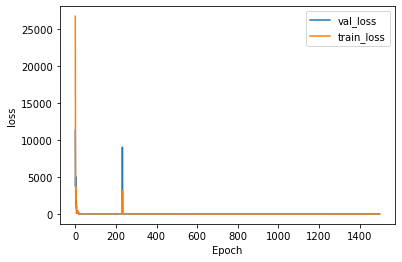

In [36]:
Y_pred_validate = model.predict(X_validate)

x = list(range(1500))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( x, vy, label='val_loss')
plt.plot( x, ty, label='train_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

# Testing

In [33]:
score = model.evaluate(X_validate, Y_validate, verbose=0, batch_size=32)

print(score)

[6.746928691864014, 6.746928691864014]
